In [ ]:
import os
import sys
sys.path.insert(0, os.path.abspath('backboning.py'))
sys.path.insert(0, os.path.abspath('poisson_backboning.py'))

In [0]:
import pandas as pd
import random
import numpy as np
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt
import backboning
import poisson_backboning

In [0]:
data = pd.read_csv('real_net.csv')

In [0]:
data

,#nodo1,#nodo2,#peso
0,coronavirus,covid19,1217.0
1,coronavirus,covid-19,790.0
2,coronavirus,podcast,688.0
3,coronavirus,quarantine,536.0
4,covid19,podcast,440.0
...,...,...,...
952923,Membership,Montgomery County,1.0
952924,Membership,Small Business,1.0
952925,Membership,Terri Sewell,1.0
952926,Meme,Money,1.0


# Backboning on giant original_file

In [0]:
g = nx.read_weighted_edgelist('preparation.csv',delimiter=",",comments='#',encoding='utf8')

In [0]:
comps = list(nx.connected_components(g))

In [0]:
giant_comp = nx.subgraph(g,comps[0])

In [0]:
giant_comp.number_of_nodes()

59279

In [0]:
df = nx.to_pandas_edgelist(giant_comp)
df = df.rename(columns={"source":"src","target":"trg","weight":"weight"})
df

,src,trg,weight
0,coronavirus,covid19,138.0
1,coronavirus,covid-19,90.0
2,coronavirus,podcast,89.0
3,coronavirus,quarantine,71.0
4,coronavirus,corona,50.0
...,...,...,...
940695,Live It,Live It Beats,1.0
940696,Logística,Lojas Físicas,1.0
940697,Mantova,Mantua Sport Network,1.0
940698,Mint,Mobile,1.0


In [0]:
df.to_csv('giant_comp_prep.csv',index=False)

In [0]:
data = backboning.read('giant_comp_prep.csv', "weight", triangular_input=True,consider_self_loops = True, undirected = True,drop_zeroes=False,sep =",")

In [0]:
data = pd.read_csv('giant_comp_prep.csv')
data = data.rename(columns={"src":"src", "trg":"trg", "weight":"nij"})
data

,src,trg,nij
0,coronavirus,covid19,138.0
1,coronavirus,covid-19,90.0
2,coronavirus,podcast,89.0
3,coronavirus,quarantine,71.0
4,coronavirus,corona,50.0
...,...,...,...
940695,Live It,Live It Beats,1.0
940696,Logística,Lojas Físicas,1.0
940697,Mantova,Mantua Sport Network,1.0
940698,Mint,Mobile,1.0


In [0]:
noise_corrected = backboning.noise_corrected(data, undirected = True, return_self_loops = False, calculate_p_value = True)

Calculating NC score...
C:\Users\salva\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [0]:
noise_corrected.to_csv('noise_corrected_prep.csv',index=False)

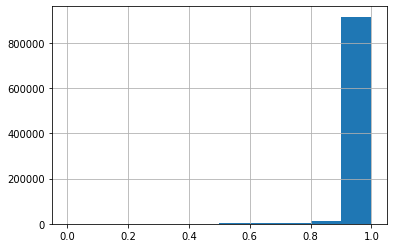

In [0]:
noise_corrected['score'].hist()

In [0]:
thresholding = backboning.thresholding(noise_corrected, threshold=0.999)
thresholding

,src,trg,nij,score
0,coronavirus,covid19,138.0,1.0
1,coronavirus,covid-19,90.0,1.0
25484,covid-19,covid-19,31.0,1.0
2,coronavirus,podcast,89.0,1.0
16895,covid19,podcast,21.0,1.0
...,...,...,...,...
939822,Spartans Football,San Jose State Spartans,1.0,1.0
939825,SJSU,San Jose State Spartans,1.0,1.0
939912,San Jose State,San Jose State Spartans,1.0,1.0
940561,PalmSunday,KingJesus,1.0,1.0


In [0]:
thresholding = thresholding[['src','trg','nij']]
thresholding
thresholding = thresholding.rename(columns={"src":"#src", "trg":"#trg", "nij":"#nij"})
thresholding

,#src,#trg,#nij
0,coronavirus,covid19,138.0
1,coronavirus,covid-19,90.0
25484,covid-19,covid-19,31.0
2,coronavirus,podcast,89.0
16895,covid19,podcast,21.0
...,...,...,...
939822,Spartans Football,San Jose State Spartans,1.0
939825,SJSU,San Jose State Spartans,1.0
939912,San Jose State,San Jose State Spartans,1.0
940561,PalmSunday,KingJesus,1.0


In [0]:
thresholding.to_csv('thresholding_prep.csv',index=False)

In [0]:
g = nx.read_weighted_edgelist('thresholding_prep.csv',delimiter=",",comments='#',encoding='utf8')

In [0]:
g.number_of_nodes()

59279

In [0]:
g.number_of_edges()

742120

In [0]:
nx.density(g)

0.00042238619971284535

# Backboning on giant dropped_file

In [0]:
data = pd.read_csv('real_net.csv')

In [0]:
str_to_drop = ['coronavirus', 'covid','lockdown','quarantine','Coronavirus','CORONAVIRUS','COVID','Covid','Lockdown','LOCKDOWN','Quarantine','QUARANTINE']
dropped_nodo1 = data[~data['#nodo1'].str.contains('|'.join(str_to_drop))]
dropped_nodo2 = dropped_nodo1[~dropped_nodo1['#nodo2'].str.contains('|'.join(str_to_drop))]
dropped_nodo2

,#nodo1,#nodo2,#peso
6,Hip Hop,rap,395.0
7,Hip Hop,Rap,359.0
15,rap,trap,274.0
21,Deep House,House,254.0
24,Hip Hop,Trap,228.0
...,...,...,...
952923,Membership,Montgomery County,1.0
952924,Membership,Small Business,1.0
952925,Membership,Terri Sewell,1.0
952926,Meme,Money,1.0


In [0]:
dropped_nodo2.to_csv('prep_link_dropped.csv',index=False)

In [0]:
g = nx.read_weighted_edgelist('prep_link_dropped.csv',delimiter=",",comments='#',encoding='utf8')

In [0]:
g.number_of_nodes()

59415

In [0]:
nx.density(g)

0.00047290675314214515

In [0]:
comps = list(nx.connected_components(g))

In [0]:
giant_comp = nx.subgraph(g,comps[0])

In [0]:
giant_comp.number_of_nodes()

56868

In [0]:
giant_comp.number_of_edges()

829333

In [0]:
nx.density(giant_comp)

0.0005128976035306255

In [0]:
df = nx.to_pandas_edgelist(giant_comp)
df = df.rename(columns={"source":"src","target":"trg","weight":"weight"})
df

,src,trg,weight
0,Hip Hop,rap,76.0
1,Hip Hop,Rap,139.0
2,Hip Hop,Trap,69.0
3,Hip Hop,trap,30.0
4,Hip Hop,2020,3.0
...,...,...,...
829328,Live It,Live It Beats,1.0
829329,Live It,Murda Beatz,1.0
829330,Live It Beats,Murda Beatz,1.0
829331,Mint,Mobile,1.0


In [0]:
df.to_csv('giant_comp_dropped_prep.csv',index=False)

In [0]:
data = backboning.read('giant_comp_dropped_prep.csv', "weight", triangular_input=True,consider_self_loops = True, undirected = True,drop_zeroes=False,sep =",")

In [0]:
data = pd.read_csv('giant_comp_dropped_prep.csv')
data = data.rename(columns={"src":"src", "trg":"trg", "weight":"nij"})
data

,src,trg,nij
0,Hip Hop,rap,76.0
1,Hip Hop,Rap,139.0
2,Hip Hop,Trap,69.0
3,Hip Hop,trap,30.0
4,Hip Hop,2020,3.0
...,...,...,...
829328,Live It,Live It Beats,1.0
829329,Live It,Murda Beatz,1.0
829330,Live It Beats,Murda Beatz,1.0
829331,Mint,Mobile,1.0


In [0]:
noise_corrected = backboning.noise_corrected(data, undirected = True, return_self_loops = False, calculate_p_value = True)

Calculating NC score...
C:\Users\salva\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:3072: RuntimeWarning: invalid value encountered in greater_equal
  cond1 = (k >= _a) & (k < _b)
C:\Users\salva\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [0]:
noise_corrected.to_csv('noise_corrected_dropped_prep.csv',index=False)

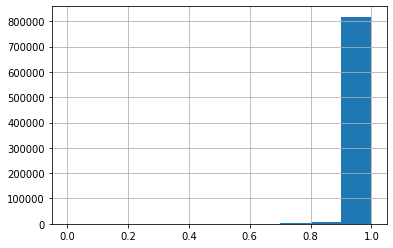

In [0]:
noise_corrected['score'].hist()

In [0]:
thresholding = backboning.thresholding(noise_corrected, threshold=0.999)
thresholding

,src,trg,nij,score
0,Hip Hop,rap,76.0,1.0
5737,rap,rap,35.0,1.0
1,Hip Hop,Rap,139.0,1.0
5892,rap,Rap,10.0,1.0
2,Hip Hop,Trap,69.0,1.0
...,...,...,...,...
828387,San Jose State,San Jose State Spartans,1.0,1.0
829148,abc illawarra,teachersrock,1.0,1.0
829174,PalmSunday,KingJesus,1.0,1.0
829252,New World Order,Conspiracy Theories,1.0,1.0


In [0]:
thresholding = thresholding[['src','trg','nij']]
thresholding
thresholding = thresholding.rename(columns={"src":"#src", "trg":"#trg", "nij":"#nij"})
thresholding

,#src,#trg,#nij
0,Hip Hop,rap,76.0
5737,rap,rap,35.0
1,Hip Hop,Rap,139.0
5892,rap,Rap,10.0
2,Hip Hop,Trap,69.0
...,...,...,...
828387,San Jose State,San Jose State Spartans,1.0
829148,abc illawarra,teachersrock,1.0
829174,PalmSunday,KingJesus,1.0
829252,New World Order,Conspiracy Theories,1.0


In [0]:
thresholding.to_csv('thresholding_dropped_prep.csv',index=False)

In [0]:
g = nx.read_weighted_edgelist('thresholding_dropped_prep.csv',delimiter=",",comments='#',encoding='utf8')

In [0]:
g.number_of_nodes()

56829

In [0]:
g.number_of_edges()

699304

In [0]:
nx.density(g)

0.0004330755068072584

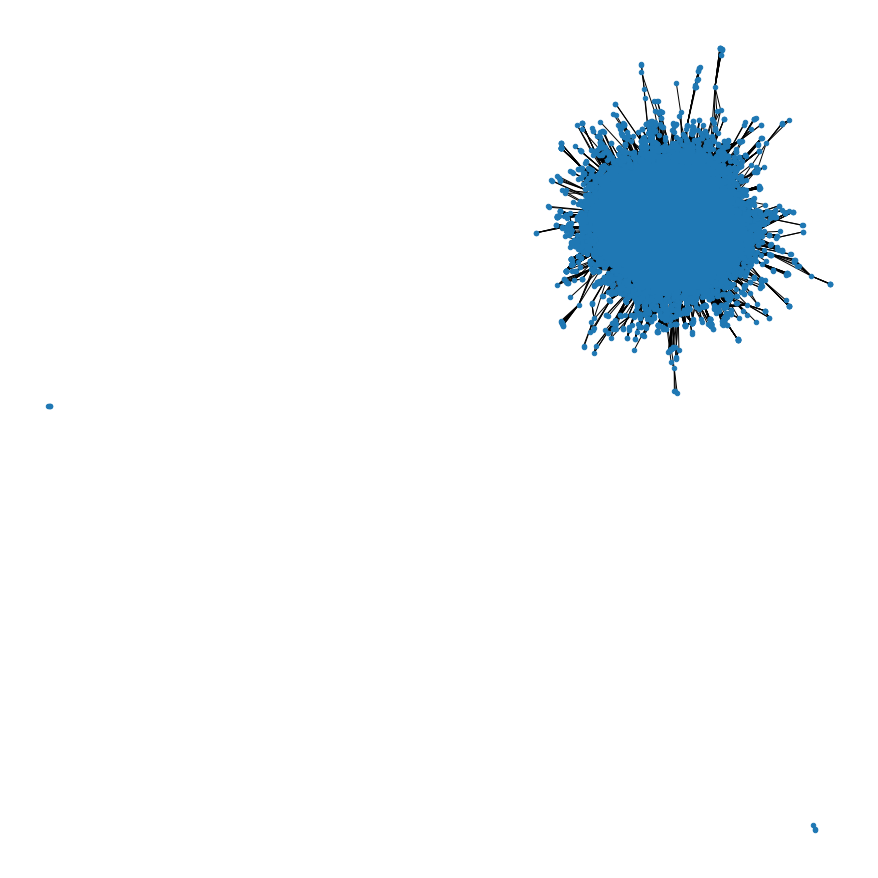

In [0]:
plt.figure(figsize=(12,12))
nx.draw(g,node_size=20,font_size=6)

# Poisson Backboning on giant original_file

In [0]:
giant = pd.read_csv('giant_comp_prep.csv')
giant = giant.rename(columns={"src":"#src", "trg":"#trg", "weight":"#weight"})
giant.to_csv('giant_for_network_prep.csv',index=False)

In [0]:
giant

,#src,#trg,#weight
0,coronavirus,covid19,138.0
1,coronavirus,covid-19,90.0
2,coronavirus,podcast,89.0
3,coronavirus,quarantine,71.0
4,coronavirus,corona,50.0
...,...,...,...
940695,Live It,Live It Beats,1.0
940696,Logística,Lojas Físicas,1.0
940697,Mantova,Mantua Sport Network,1.0
940698,Mint,Mobile,1.0


In [0]:
g = nx.read_weighted_edgelist('giant_for_network_prep.csv',delimiter=",",comments='#',encoding='utf8')

In [0]:
g_filtered = poisson_backboning.graph_backboning(g)

In [0]:
L = g_filtered.number_of_edges()
N = g_filtered.number_of_nodes()
L, N

(52215, 5727)

In [0]:
nx.density(g_filtered)

0.0031843180183942395

In [0]:
comps = list(nx.connected_components(g_filtered))

In [0]:
giant_comp = nx.subgraph(g_filtered,comps[0])

# Backboning on original before giant

In [0]:
data = pd.read_csv('preparation.csv')

In [0]:
data = data.rename(columns={"#nodo1":"src","#nodo2":"trg","#peso":"nij"})
data

,src,trg,nij
0,coronavirus,covid19,1220.0
1,coronavirus,covid-19,783.0
2,coronavirus,podcast,686.0
3,Bass,Drum &amp,593.0
4,coronavirus,quarantine,543.0
...,...,...,...
962583,Melodic,f2f,1.0
962584,Melodic,fabian,1.0
962585,Melodic,florianopolis,1.0
962586,Melodic,food,1.0


In [0]:
data.to_csv('prep_for_backboning.csv',index=False)

In [0]:
data = pd.read_csv('prep_for_backboning.csv')

In [0]:
noise_corrected = backboning.noise_corrected(data, undirected = True, return_self_loops = False, calculate_p_value = True)

Calculating NC score...
C:\Users\salva\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [0]:
noise_corrected

,src,trg,nij,score
0,coronavirus,covid19,1220.0,1.000000e+00
19478,Bass,covid19,9.0,4.268880e-12
24,corona,covid19,230.0,1.000000e+00
416,Hip Hop,covid19,117.0,9.999818e-01
160840,COVID-19,covid19,2.0,2.395534e-15
...,...,...,...,...
958388,Marcelo Passina,Cordoba,1.0,1.000000e+00
958673,Marvin Ewing,antiviral,1.0,1.000000e+00
959953,Mentes,carencia,1.0,1.000000e+00
960029,Mensaje Cristiano,Devocionales,1.0,1.000000e+00


In [0]:
thresholding = backboning.thresholding(noise_corrected, threshold=0.95)
thresholding

,src,trg,nij,score
0,coronavirus,covid19,1220.0,1.000000
24,corona,covid19,230.0,1.000000
416,Hip Hop,covid19,117.0,0.999982
18,covid-19,covid19,265.0,1.000000
804,Rap,covid19,56.0,1.000000
...,...,...,...,...
958388,Marcelo Passina,Cordoba,1.0,1.000000
958673,Marvin Ewing,antiviral,1.0,1.000000
959953,Mentes,carencia,1.0,1.000000
960029,Mensaje Cristiano,Devocionales,1.0,1.000000


In [0]:
renamed = thresholding.rename(columns={"src":"#src","trg":"#trg","nij":"#nij"})
renamed = renamed[['#src','#trg','#nij']]
renamed

,#src,#trg,#nij
0,coronavirus,covid19,1220.0
24,corona,covid19,230.0
416,Hip Hop,covid19,117.0
18,covid-19,covid19,265.0
804,Rap,covid19,56.0
...,...,...,...
958388,Marcelo Passina,Cordoba,1.0
958673,Marvin Ewing,antiviral,1.0
959953,Mentes,carencia,1.0
960029,Mensaje Cristiano,Devocionales,1.0


In [0]:
renamed.to_csv('renamed_to_giant_prep.csv',index=False)

In [0]:
g = nx.read_weighted_edgelist('renamed_to_giant_prep.csv',delimiter=",",comments='#',encoding='utf8')

In [0]:
comps = list(nx.connected_components(g))

In [0]:
giant_comp = nx.subgraph(g,comps[0])

In [0]:
giant_comp.number_of_nodes()

59279

In [0]:
giant_comp.number_of_edges()

906799

In [0]:
nx.density(giant_comp)

0.0005161151613127371

In [0]:
#plt.figure(figsize=(12,12))
#nx.draw(giant_comp,node_size=60,font_size=8)

# Backboning on dropped before giant

In [0]:
data = pd.read_csv('real_net.csv')

In [0]:
str_to_drop = ['coronavirus', 'covid','lockdown','quarantine','Coronavirus','CORONAVIRUS','COVID','Covid','Lockdown','LOCKDOWN','Quarantine','QUARANTINE']
dropped_nodo1 = data[~data['#nodo1'].str.contains('|'.join(str_to_drop))]
dropped_nodo2 = dropped_nodo1[~dropped_nodo1['#nodo2'].str.contains('|'.join(str_to_drop))]
dropped_nodo2

,#nodo1,#nodo2,#peso
6,Hip Hop,rap,395.0
7,Hip Hop,Rap,359.0
15,rap,trap,274.0
21,Deep House,House,254.0
24,Hip Hop,Trap,228.0
...,...,...,...
952923,Membership,Montgomery County,1.0
952924,Membership,Small Business,1.0
952925,Membership,Terri Sewell,1.0
952926,Meme,Money,1.0


In [0]:
dropped_nodo2 = dropped_nodo2.rename(columns={"#nodo1":"src","#nodo2":"trg","#peso":"nij"})
dropped_nodo2

,src,trg,nij
6,Hip Hop,rap,395.0
7,Hip Hop,Rap,359.0
15,rap,trap,274.0
21,Deep House,House,254.0
24,Hip Hop,Trap,228.0
...,...,...,...
952923,Membership,Montgomery County,1.0
952924,Membership,Small Business,1.0
952925,Membership,Terri Sewell,1.0
952926,Meme,Money,1.0


In [0]:
dropped_nodo2.to_csv('dropped_for_backboning_prep.csv',index=False)

In [0]:
noise_corrected = backboning.noise_corrected(dropped_nodo2, undirected = True, return_self_loops = False, calculate_p_value = True)

Calculating NC score...
C:\Users\salva\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [0]:
thresholding = backboning.thresholding(noise_corrected, threshold=0.95)
thresholding

,src,trg,nij,score
6,Hip Hop,rap,395.0,1.000000
2434,rap,rap,35.0,0.999987
399,corona,rap,125.0,1.000000
366,beat,rap,171.0,1.000000
418,2020,rap,112.0,1.000000
...,...,...,...,...
949229,Marvin Ewing,antiviral,1.0,1.000000
949916,Michael Retzlaff,LeanSolidaritätsFonds,1.0,1.000000
951042,Michelle-Smith,Source-Financial-Advisors,1.0,1.000000
952158,Mentes,carencia,1.0,1.000000


In [0]:
renamed = thresholding.rename(columns={"src":"#src","trg":"#trg","nij":"#nij"})
renamed = renamed[['#src','#trg','#nij']]
renamed

,#src,#trg,#nij
6,Hip Hop,rap,395.0
2434,rap,rap,35.0
399,corona,rap,125.0
366,beat,rap,171.0
418,2020,rap,112.0
...,...,...,...
949229,Marvin Ewing,antiviral,1.0
949916,Michael Retzlaff,LeanSolidaritätsFonds,1.0
951042,Michelle-Smith,Source-Financial-Advisors,1.0
952158,Mentes,carencia,1.0


In [0]:
renamed.to_csv('renamed_dropped_to_giant_prep.csv',index=False)

In [0]:
g = nx.read_weighted_edgelist('renamed_dropped_to_giant_prep.csv',delimiter=",",comments='#',encoding='utf8')

In [0]:
comps = list(nx.connected_components(g))

In [0]:
giant_comp = nx.subgraph(g,comps[0])

In [0]:
giant_comp.number_of_nodes()

56868

In [0]:
giant_comp.number_of_edges()

808925

In [0]:
nx.density(giant_comp)

0.000500276359358679

In [0]:
#plt.figure(figsize=(12,12))
#nx.draw(giant_comp,node_size=60,font_size=8)

# Poisson backboning on original before giant

In [0]:
data = pd.read_csv('preparation.csv')
data

,#nodo1,#nodo2,#peso
0,coronavirus,covid19,1220.0
1,coronavirus,covid-19,783.0
2,coronavirus,podcast,686.0
3,Bass,Drum &amp,593.0
4,coronavirus,quarantine,543.0
...,...,...,...
962583,Melodic,f2f,1.0
962584,Melodic,fabian,1.0
962585,Melodic,florianopolis,1.0
962586,Melodic,food,1.0


In [0]:
g = nx.read_weighted_edgelist('preparation.csv',delimiter=",",comments='#',encoding='utf8')

In [0]:
g_filtered = poisson_backboning.graph_backboning(g)

In [0]:
comps = list(nx.connected_components(g_filtered))

In [0]:
giant_comp = nx.subgraph(g_filtered,comps[0])

In [0]:
giant_comp.number_of_nodes()

5481

In [0]:
giant_comp.number_of_edges()

51396

In [0]:
nx.density(giant_comp)

0.0034223069209225764

In [0]:
g_filtered.number_of_nodes()

5778

In [0]:
nx.density(g_filtered)

0.0031328204797278904